## Логистическая регрессия
[Теория GFG](https://www.geeksforgeeks.org/understanding-logistic-regression/)

[Датасет](https://www.kaggle.com/datasets/dragonheir/logistic-regression)


In [15]:
# Блок с используемыми библиотеками
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report 
from pandas import DataFrame

In [16]:
iris = datasets.load_iris()
df = DataFrame(iris.data, columns=iris.feature_names)
df['Species'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
q1 = df['sepal width (cm)'].quantile(0.25)
q3 = df['sepal width (cm)'].quantile(0.75)
iqr = q3 - q1
df = df[(df['sepal width (cm)'] >= q1-1.5*iqr) & (df['sepal width (cm)'] <= q3+1.5*iqr)]
df.shape

(146, 5)

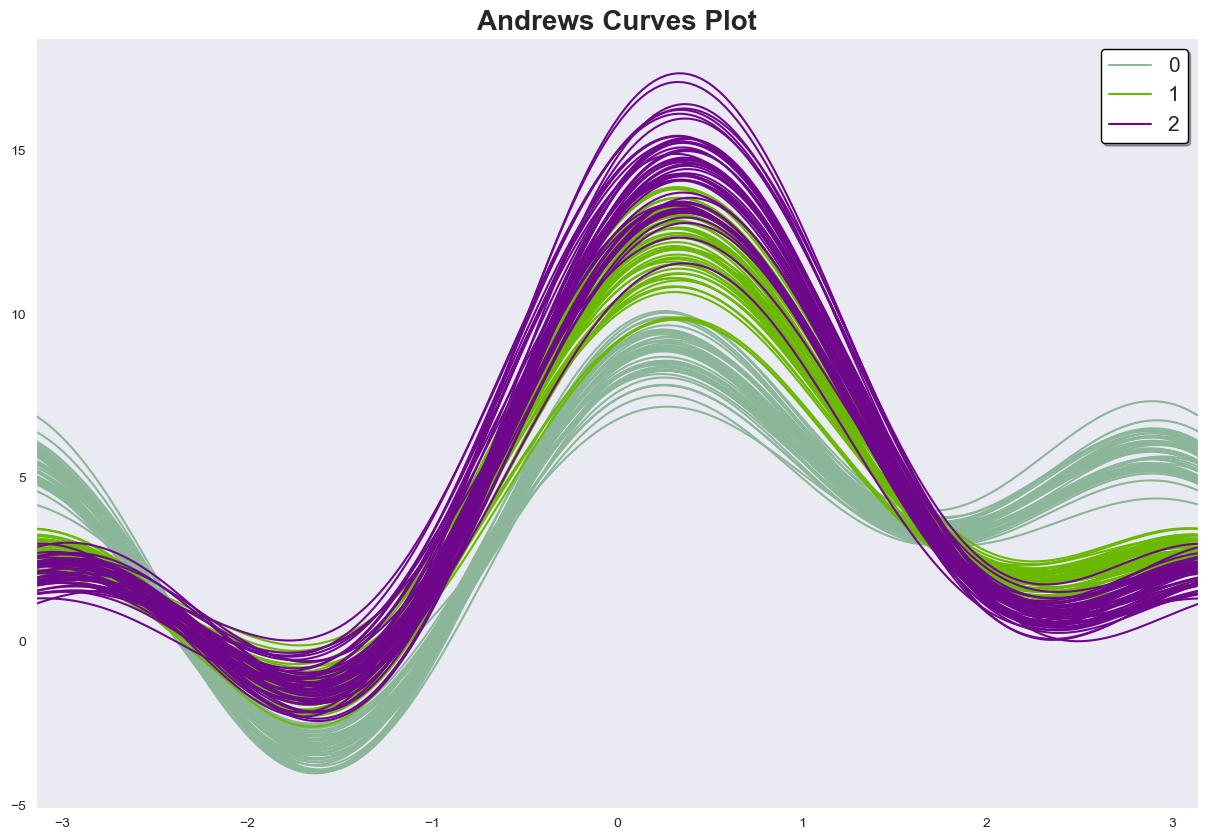

In [18]:
from pandas.plotting import andrews_curves
plt.figure(figsize=(15,10))
andrews_curves(df, "Species")
plt.title('Andrews Curves Plot', fontsize=20, fontweight='bold')
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

C:\Users\snoop\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\snoop\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

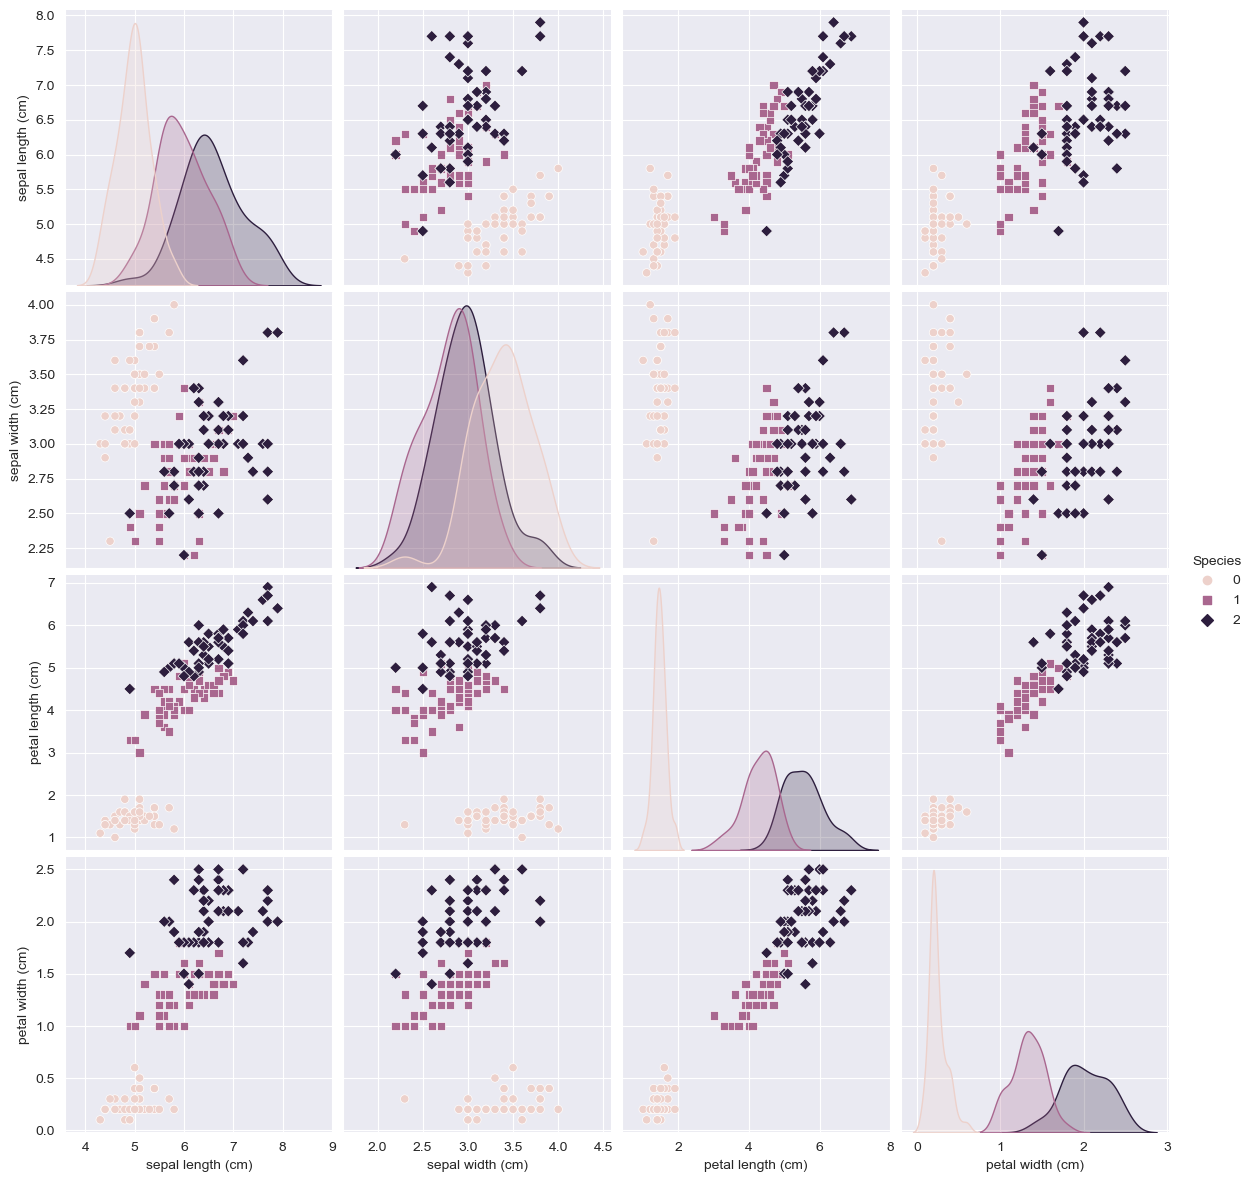

In [19]:
plt.figure()
sns.pairplot(df, hue = "Species", size=3, markers=["o", "s", "D"])
plt.show()

In [20]:
X = df.drop("Species",axis=1)
y = df["Species"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state= 1)

In [21]:
dt=LogisticRegression(solver='lbfgs', max_iter=1000)
dt.fit(X_train,y_train)

y_pred_train = dt.predict(X_train)
y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)

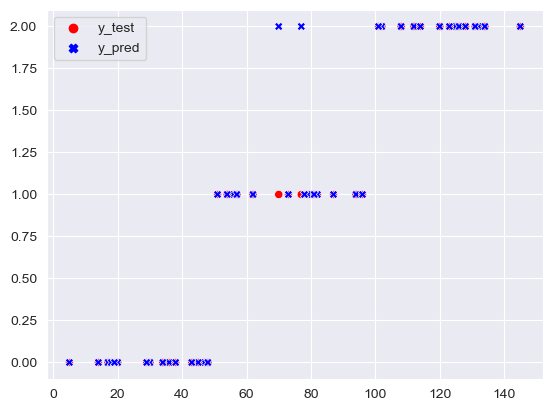

In [22]:
sns.scatterplot(
    data=DataFrame({'y_test': y_test, 'y_pred': y_pred}),
    palette={'y_pred': 'blue', 'y_test': 'red'}
)
plt.show()

In [23]:
print('Accuracy of Decision Tree-Train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of Decision Tree-Test: ', accuracy_score(y_pred, y_test))

Accuracy of Decision Tree-Train:  0.9803921568627451
Accuracy of Decision Tree-Test:  0.9545454545454546


In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.87      0.93        15
           2       0.88      1.00      0.93        14

    accuracy                           0.95        44
   macro avg       0.96      0.96      0.95        44
weighted avg       0.96      0.95      0.95        44
